In [1]:
import random
import numpy as np
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
import warnings
from collections import defaultdict
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）

In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
def get_city_info(city_coordination):
    city_location={}
    for line in city_coordination.split('\n'):
        if not line.strip():continue
        if line.startswith('//'):continue
        city=re.findall(r"name:'(\w+)'",line)[0]
        x_y=re.findall(r'geoCoord:\[(\d+.?\d*),\s*(\d+.?\d*)\]',line)[0]
        x_y=tuple(map(float,x_y))
        city_location[city]=x_y
    return city_location

In [4]:
city_info=get_city_info(city_coordination=coordination_source)

In [5]:
import math
def get_city_distance(city1,city2,city_info:dict):
    if (city1 not in city_info) or (city2 not in city_info):
        print('Please input the right city for calculating distance')
        return
    loc1,loc2=city_info[city1],city_info[city2]
    # loc here 经度，纬度
    loc1=tuple(map(lambda x:x/180*math.pi,loc1))
    loc2=tuple(map(lambda x:x/180*math.pi,loc2))
    # earch average raduis 6371 km
    R=6371
    L=R*math.acos(math.cos(loc1[1])*math.cos(loc2[1])*math.cos(loc1[0]-loc2[0])+math.sin(loc1[1])*math.sin(loc2[1]))
    return L

In [6]:
get_city_distance(city1='上海',city2='北京',city_info=city_info)

1068.1567232158181

In [7]:
def build_city_connection(city_info,city_distance_func,distance_threshold):
    city_connection_dict=defaultdict(list)
    for city1 in city_info:
        for city2 in city_info:
            if city1==city2:continue
            if city_distance_func(city1,city2,city_info)<=distance_threshold:
                city_connection_dict[city1].append(city2)
    return city_connection_dict

In [8]:
city_connection=build_city_connection(city_info,city_distance_func=get_city_distance,distance_threshold=700)
print(city_connection)

defaultdict(<class 'list'>, {'兰州': ['嘉峪关', '西宁', '成都', '西安', '银川'], '嘉峪关': ['兰州', '西宁'], '西宁': ['兰州', '嘉峪关', '成都', '银川'], '成都': ['兰州', '西宁', '拉萨', '贵阳', '西安', '重庆'], '石家庄': ['郑州', '济南', '太原', '西安', '北京', '天津', '呼和浩特'], '拉萨': ['成都', '贵阳', '重庆', '南宁'], '贵阳': ['成都', '拉萨', '长沙', '重庆', '南宁'], '武汉': ['郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '西安', '上海'], '郑州': ['石家庄', '武汉', '济南', '南京', '合肥', '太原', '西安', '北京', '天津', '呼和浩特'], '济南': ['石家庄', '郑州', '南京', '合肥', '太原', '北京', '天津', '呼和浩特'], '南京': ['武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '上海'], '合肥': ['武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '长沙', '上海'], '杭州': ['武汉', '南京', '合肥', '南昌', '福州', '上海'], '南昌': ['武汉', '南京', '合肥', '杭州', '福州', '广州', '长沙', '上海'], '福州': ['武汉', '南京', '合肥', '杭州', '南昌', '广州', '长沙', '上海', '香港'], '广州': ['南昌', '福州', '长沙', '南宁', '香港', '澳门'], '长沙': ['贵阳', '武汉', '合肥', '南昌', '福州', '广州', '重庆', '香港', '澳门'], '沈阳': ['长春', '哈尔滨', '北京', '天津'], '长春': ['沈阳', '哈尔滨'], '哈尔滨': ['沈阳', '长春'], '太原': ['石家庄', '郑州', '济南', '西安', '北京', '天津', '呼和浩特', '银川'],

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


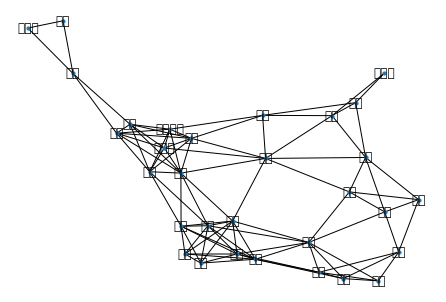

In [9]:
cities_connection_graph=nx.Graph(city_connection)
nx.draw(cities_connection_graph,with_labels=True,node_size=10)

In [10]:
def build_city_connection_with_distance(city_info,city_distance_func,distance_threshold):
    city_connection_dict=defaultdict(lambda:defaultdict(dict))
    for city1 in city_info:
        for city2 in city_info:
            if city1==city2:continue
            if city_distance_func(city1,city2,city_info)<=distance_threshold:
                city_connection_dict[city1][city2]['distance']=city_distance_func(city1,city2,city_info)
    return city_connection_dict

In [11]:
city_connection2=build_city_connection_with_distance(city_info,city_distance_func=get_city_distance,distance_threshold=700)
print(city_connection2)

defaultdict(<function build_city_connection_with_distance.<locals>.<lambda> at 0x7f14d7328dd0>, {'兰州': defaultdict(<class 'dict'>, {'嘉峪关': {'distance': 620.4889591639372}, '西宁': {'distance': 187.82586855688643}, '成都': {'distance': 596.7911571272845}, '西安': {'distance': 513.2668129520645}, '银川': {'distance': 352.32341120060744}}), '嘉峪关': defaultdict(<class 'dict'>, {'兰州': {'distance': 620.4889591639372}, '西宁': {'distance': 449.9364693111762}}), '西宁': defaultdict(<class 'dict'>, {'兰州': {'distance': 187.82586855688643}, '嘉峪关': {'distance': 449.9364693111762}, '成都': {'distance': 689.2029510024237}, '银川': {'distance': 452.40288431367253}}), '成都': defaultdict(<class 'dict'>, {'兰州': {'distance': 596.7911571272845}, '西宁': {'distance': 689.2029510024237}, '拉萨': {'distance': 639.5165625691019}, '贵阳': {'distance': 524.1123966444843}, '西安': {'distance': 608.6828495058879}, '重庆': {'distance': 267.02169394624366}}), '石家庄': defaultdict(<class 'dict'>, {'郑州': {'distance': 371.1136731640668}, '济南': {'d

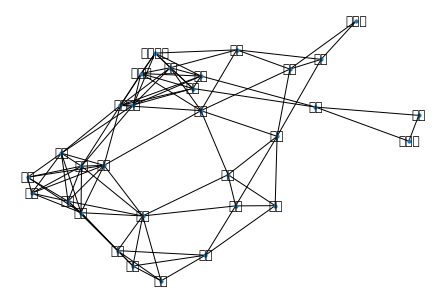

In [12]:
cities_connection_with_distance_graph=nx.Graph(city_connection2)
nx.draw(cities_connection_with_distance_graph,with_labels=True,node_size=10)

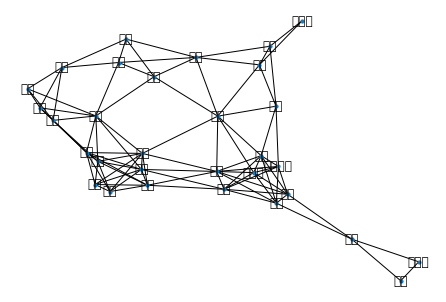

In [13]:
weighted_edges=[]
for city1 in city_connection2:
    for city2,distance in city_connection2[city1].items():
        weighted_edges.append((city1,city2,distance))
new_graph=nx.Graph()
new_graph.add_edges_from(weighted_edges)
nx.draw(new_graph,with_labels=True,node_size=10)

In [14]:
for edge in new_graph.edges(data=True):
    print(edge)

('兰州', '嘉峪关', {'distance': 620.4889591639372})
('兰州', '西宁', {'distance': 187.82586855688643})
('兰州', '成都', {'distance': 596.7911571272845})
('兰州', '西安', {'distance': 513.2668129520645})
('兰州', '银川', {'distance': 352.32341120060744})
('嘉峪关', '西宁', {'distance': 449.9364693111762})
('西宁', '成都', {'distance': 689.2029510024237})
('西宁', '银川', {'distance': 452.40288431367253})
('成都', '拉萨', {'distance': 639.5165625691019})
('成都', '贵阳', {'distance': 524.1123966444843})
('成都', '西安', {'distance': 608.6828495058879})
('成都', '重庆', {'distance': 267.02169394624366})
('西安', '石家庄', {'distance': 648.8759358477427})
('西安', '武汉', {'distance': 653.3623508522397})
('西安', '郑州', {'distance': 434.0157801749922})
('西安', '太原', {'distance': 513.4925709703232})
('西安', '重庆', {'distance': 567.8639605605604})
('西安', '银川', {'distance': 524.9879806958593})
('银川', '太原', {'distance': 551.1862979636878})
('银川', '呼和浩特', {'distance': 529.4523867613132})
('拉萨', '贵阳', {'distance': 433.1945765672628})
('拉萨', '重庆', {'distance':

In [15]:
def get_route_totaldistance(route:list,city_connection:dict):
    total_distance=0
    for index in range(len(route)-1):
        total_distance+=city_connection[route[index]][route[index+1]]['distance']
    return total_distance

In [16]:
distance1=get_route_totaldistance(route=['北京', '济南', '合肥', '上海'],city_connection=city_connection2)
distance2=get_route_totaldistance(route=['北京', '济南', '南京', '上海'],city_connection=city_connection2)
distance3=get_route_totaldistance(route=['北京', '郑州', '武汉', '上海'],city_connection=city_connection2)
print("Total_distance for ['北京', '济南', '合肥', '上海'] is {}".format(distance1))
print("Total_distance for ['北京', '济南', '南京', '上海'] is {}".format(distance2))
print("Total_distance for ['北京', '郑州', '武汉', '上海'] is {}".format(distance3))

Total_distance for ['北京', '济南', '合肥', '上海'] is 1305.0923147238188
Total_distance for ['北京', '济南', '南京', '上海'] is 1176.0342374489117
Total_distance for ['北京', '郑州', '武汉', '上海'] is 1789.2440342664058


In [17]:
def get_proper_route(city_connection,start,destination):
    need_to_visits=[[start]]
    already_visits=set()
    while need_to_visits:
        path=need_to_visits.pop(0)
        current_city=path[-1]
        if current_city in already_visits:continue
        for city in city_connection[current_city]:
            if city in path:continue
            new_path=path+[city]
            need_to_visits.append(new_path)
            if city==destination:
                return new_path
        already_visits.add(current_city)
        need_to_visits=sorted(need_to_visits,key=lambda x:get_route_totaldistance(x,city_connection))

In [18]:
proper_route1=get_proper_route(city_connection=city_connection2,start='北京',destination='上海')
print('best route from 北京 to 上海:',proper_route1)
proper_route2=get_proper_route(city_connection=city_connection2,start='上海',destination='长春')
print('best route from 上海 to 长春:',proper_route2)

best route from 北京 to 上海: ['北京', '济南', '合肥', '上海']
best route from 上海 to 长春: ['上海', '南京', '济南', '天津', '沈阳', '长春']


In [19]:
def get_best_route(city_connection,start,destination):
    need_to_visits=[[start]]
    already_visits=set()
    output_path=[]
    while need_to_visits:
        path=need_to_visits.pop(0)
        current_city=path[-1]
        if current_city in already_visits:continue
        for city in city_connection[current_city]:
            if city in path:continue
            new_path=path+[city]
            need_to_visits.append(new_path)
            if city==destination:
                output_path.append(new_path)
#                 return new_path
        already_visits.add(current_city)
        need_to_visits=sorted(need_to_visits,key=lambda x:get_route_totaldistance(x,city_connection))
        if len(output_path)>=1000:
            break
#     print('all_possible_routes:',output_path)
    return sorted(output_path,key=lambda x:get_route_totaldistance(x,city_connection))[0]

In [20]:
best_route1=get_best_route(city_connection=city_connection2,start='北京',destination='上海')
print('best route from 北京 to 上海:',best_route1)
best_route2=get_best_route(city_connection=city_connection2,start='上海',destination='长春')
print('best route from 上海 to 长春:',best_route2)

best route from 北京 to 上海: ['北京', '济南', '南京', '上海']
best route from 上海 to 长春: ['上海', '南京', '济南', '天津', '沈阳', '长春']
